In [1]:
##loading dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
##load data
bikedf=pd.read_excel('SeoulBikeData.xlsx')
bikedf.head()

Date  Rented Bike Count  Hour  Temperature(蚓)  Humidity(%)  \
0 2017-12-01                254     0            -5.2           37   
1 2017-12-01                204     1            -5.5           38   
2 2017-12-01                173     2            -6.0           39   
3 2017-12-01                107     3            -6.2           40   
4 2017-12-01                 78     4            -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(蚓)  \
0               2.2              2000                     -17.6   
1               0.8              2000                     -17.6   
2               1.0              2000                     -17.7   
3               0.9              2000                     -17.6   
4               2.3              2000                     -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

# Dataset Summary

In [3]:
##shape of the data
bikedf.shape

(8760, 14)

In [4]:
##name of the columns available
bikedf.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(蚓)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(蚓)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [5]:
##info of the data
bikedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      8760 non-null   datetime64[ns]
 1   Rented Bike Count         8760 non-null   int64         
 2   Hour                      8760 non-null   int64         
 3   Temperature(蚓)            8760 non-null   float64       
 4   Humidity(%)               8760 non-null   int64         
 5   Wind speed (m/s)          8760 non-null   float64       
 6   Visibility (10m)          8760 non-null   int64         
 7   Dew point temperature(蚓)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)   8760 non-null   float64       
 9   Rainfall(mm)              8760 non-null   float64       
 10  Snowfall (cm)             8760 non-null   float64       
 11  Seasons                   8760 non-null   object        
 12  Holiday             

In [6]:
## Normalize the datatypes in a float datatype
cols=[n for n in bikedf.columns if bikedf[n].dtypes=='int']
cols
for r in cols:
    bikedf[r]=bikedf[r].astype('float')

In [7]:
##data type is changed and uniform
bikedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      8760 non-null   datetime64[ns]
 1   Rented Bike Count         8760 non-null   float64       
 2   Hour                      8760 non-null   float64       
 3   Temperature(蚓)            8760 non-null   float64       
 4   Humidity(%)               8760 non-null   float64       
 5   Wind speed (m/s)          8760 non-null   float64       
 6   Visibility (10m)          8760 non-null   float64       
 7   Dew point temperature(蚓)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)   8760 non-null   float64       
 9   Rainfall(mm)              8760 non-null   float64       
 10  Snowfall (cm)             8760 non-null   float64       
 11  Seasons                   8760 non-null   object        
 12  Holiday             

In [8]:
##check duplicate
bikedf.duplicated().value_counts()

False    8760
Name: count, dtype: int64

In [9]:
##missining values
bikedf.isnull().sum()

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(蚓)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(蚓)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

## Observation
No duplicates present.

In [10]:
##count the presence of the unique values in each features
bikedf.nunique().sort_values(ascending=True)

Holiday                        2
Functioning Day                2
Seasons                        4
Hour                          24
Snowfall (cm)                 51
Rainfall(mm)                  61
Wind speed (m/s)              65
Humidity(%)                   90
Solar Radiation (MJ/m2)      345
Date                         365
Temperature(蚓)               546
Dew point temperature(蚓)     556
Visibility (10m)            1789
Rented Bike Count           2166
dtype: int64

In [11]:
##summary stats 
round(bikedf.describe()).T

count                           mean  \
Date                        8760  2018-05-31 23:59:59.999999744   
Rented Bike Count         8760.0                          705.0   
Hour                      8760.0                           12.0   
Temperature(蚓)            8760.0                           13.0   
Humidity(%)               8760.0                           58.0   
Wind speed (m/s)          8760.0                            2.0   
Visibility (10m)          8760.0                         1437.0   
Dew point temperature(蚓)  8760.0                            4.0   
Solar Radiation (MJ/m2)   8760.0                            1.0   
Rainfall(mm)              8760.0                            0.0   
Snowfall (cm)             8760.0                            0.0   

                                          min                  25%  \
Date                      2017-12-01 00:00:00  2018-03-02 00:00:00   
Rented Bike Count                         0.0                191.0   
Hour                                      0.0                  6.0   
Temperature(蚓)                          -18.0                  4.0   
Humidity(%)                               0.0                 42.0   
Wind speed (m/s)                          0.0                  1.0   
Visibility (10m)                         27.0                940.0   
Dew point temperature(蚓)                -31.0                 -5.0   
Solar Radiation (MJ/m2)                   0.0                  0.0   
Rainfall(mm)                              0.0                  0.0   
Snowfall (cm)                             0.0                  0.0   

                                          50%                  75%  \
Date                      2018-06-01 00:00:00  2018-08-31 00:00:00   
Rented Bike Count                       504.0               1065.0   
Hour                                     12.0                 17.0   
Temperature(蚓)                           14.0                 22.0   
Humidity(%)                              57.0                 74.0   
Wind speed (m/s)                          2.0                  2.0   
Visibility (10m)                       1698.0               2000.0   
Dew point temperature(蚓)                  5.0                 15.0   
Solar Radiation (MJ/m2)                   0.0                  1.0   
Rainfall(mm)                              0.0                  0.0   
Snowfall (cm)                             0.0                  0.0   

                                          max    std  
Date                      2018-11-30 00:00:00    NaN  
Rented Bike Count                      3556.0  645.0  
Hour                                     23.0    7.0  
Temperature(蚓)                           39.0   12.0  
Humidity(%)                              98.0   20.0  
Wind speed (m/s)                          7.0    1.0  
Visibility (10m)                       2000.0  608.0  
Dew point temperature(蚓)                 27.0   13.0  
Solar Radiation (MJ/m2)                   4.0    1.0  
Rainfall(mm)                             35.0    1.0  
Snowfall (cm)                             9.0    0.0

# Observation
    75% of the rented bike count is less than 1065.25 in the dataset.
    75% of the bikes are rented less  17.25 hours.
    75% of bikes are rented when there is the temparature is less then 22.50.
    75% of bikes are rented when humidity percentage is lesser than 74.00	.
    75% of bikes are rented when the visibility(10m) of 2000.00m.
    75% of the bikes are rented when the solar radiation is lesser than 0.93.
    75% of the bikes are rented when rainfall(mm) and snowfall(cm) is lesser than 0.00.

## Standard deviation
Rented bike count seems highly spreadout because the standard deviation value = 644.99 and the mean value = 704.602055 are almost close to each other, it could have data skewness issue.

## Maximum values
1. Minimum bike rent count is 0 and Maximum is 3556.0 in a day.
2. Maximum temperatur is 39.4 and minimum is -17.



In [12]:
#extreme values in Temperature(°C)
print(bikedf['Temperature(蚓)'].max())
print(bikedf['Temperature(蚓)'].min())

39.4
-17.8


In [13]:
##check which row has the extreme value for max temperature
bikedf[bikedf['Temperature(蚓)']==bikedf['Temperature(蚓)'].max()]

Date  Rented Bike Count  Hour  Temperature(蚓)  Humidity(%)  \
5848 2018-08-01              561.0  16.0            39.4         39.0   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(蚓)  \
5848               2.5            1897.0                      22.8   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
5848                     2.42           0.0            0.0  Summer   

         Holiday Functioning Day  
5848  No Holiday             Yes

In [14]:
##check which row has the extreme value for minimum temperature
bikedf[bikedf['Temperature(蚓)']==bikedf['Temperature(蚓)'].min()]

Date  Rented Bike Count  Hour  Temperature(蚓)  Humidity(%)  \
1352 2018-01-26              322.0   8.0           -17.8         40.0   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(蚓)  \
1352               2.5            2000.0                     -28.1   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
1352                      0.0           0.0            0.5  Winter   

         Holiday Functioning Day  
1352  No Holiday             Yes

In [15]:
##extreme values in Rainfall(mm) 
print(bikedf['Rainfall(mm)'].max())
print(bikedf['Rainfall(mm)'].min())

35.0
0.0


In [16]:
##check which row has the extreme value for snowfall
print(bikedf['Snowfall (cm)'].max())
print(bikedf['Snowfall (cm)'].min())

8.8
0.0


In [17]:
##check which row has the extreme value for snowfall
bikedf[bikedf['Snowfall (cm)']==bikedf['Snowfall (cm)'].max()]

Date  Rented Bike Count  Hour  Temperature(蚓)  Humidity(%)  \
8602 2018-11-24               62.0  10.0             0.4         97.0   
8603 2018-11-24              114.0  11.0             1.2         97.0   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(蚓)  \
8602               1.8             207.0                       0.0   
8603               2.3             975.0                       0.7   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8602                     0.00           0.0            8.8  Autumn   
8603                     0.07           0.0            8.8  Autumn   

         Holiday Functioning Day  
8602  No Holiday             Yes  
8603  No Holiday             Yes

In [18]:
##check which row has the extreme value for rainfall
bikedf[bikedf['Rainfall(mm)']==bikedf['Rainfall(mm)'].max()]

Date  Rented Bike Count  Hour  Temperature(蚓)  Humidity(%)  \
3997 2018-05-16              151.0  13.0            21.8         97.0   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(蚓)  \
3997               2.4             682.0                      21.2   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
3997                     0.06          35.0            0.0  Spring   

         Holiday Functioning Day  
3997  No Holiday             Yes

In [19]:
##numerical features
num_feature=[num for num in bikedf.columns if bikedf[num].dtype!='O']
print(num_feature)
print()
cat_feature=[cat for cat in bikedf.columns if bikedf[cat].dtype=='object']
cat_feature

['Date', 'Rented Bike Count', 'Hour', 'Temperature(蚓)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(蚓)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']



['Seasons', 'Holiday', 'Functioning Day']

## Observation 
Names of the columns requires the normalization because of it includes unwanted symbols etc.

## Rename with Abbrev:
1. Date = Date
2. Rented Bike Count= Count
3. Hour = Hour
4. Temperature(蚓) =Temp
5. Humidity(%)= Humidity
6. Wind speed (m/s)= Wind
7. Visibility (10m) = Visibility
8. Dew point temperature(蚓)= DewTemp
9. Solar Radiation (MJ/m2) = SolarRad
10. Rainfall(mm)= Rainfall
11. Snowfall (cm)= Snowfall
12. Seasons= Seasons
13. Holiday = Holiday
14. Functioning Day= FuncDay

In [20]:
#
bikedf['Seasons'].value_counts()

Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64

## Train Test Splitting

In [21]:
x_train,x_test,y_train,y_test=train_test_split(bikedf.drop('Rented Bike Count', axis=1),bikedf.iloc[:,1], test_size=0.2,random_state=42)

# Data Manipulation

In [22]:
## rename the columns to make all coloumns standard
# df_bike=bikedf.copy()

##renaming the columns with the standard names
x_train.rename({'Rented Bike Count':'Count',
                'Temperature(蚓)':'Temp',
                'Humidity(%)':'Humidity',
                'Wind speed (m/s)':'Wind',
                'Visibility (10m)':'Visibility',
                'Dew point temperature(蚓)':'DewTemp',
                'Solar Radiation (MJ/m2)':'SolarRad',
                'Rainfall(mm)':'Rainfall',
                'Snowfall (cm)':'Snowfall',
                'Functioning Day':'FuncDay'},axis=1,inplace=True)
x_train.head()

Date  Hour  Temp  Humidity  Wind  Visibility  DewTemp  SolarRad  \
8415 2018-11-16  15.0  13.2      61.0   3.9       719.0      5.8      1.03   
5049 2018-06-29   9.0  22.9      86.0   1.7       538.0     20.4      0.76   
8395 2018-11-15  19.0  11.2      46.0   1.4       869.0      0.0      0.00   
1535 2018-02-02  23.0  -2.6      69.0   2.0      1434.0     -7.5      0.00   
5518 2018-07-18  22.0  27.2      73.0   1.5      1005.0     21.9      0.00   

      Rainfall  Snowfall Seasons     Holiday FuncDay  
8415       0.0       0.0  Autumn  No Holiday     Yes  
5049       0.0       0.0  Summer  No Holiday     Yes  
8395       0.0       0.0  Autumn  No Holiday     Yes  
1535       0.0       0.0  Winter  No Holiday     Yes  
5518       0.0       0.0  Summer  No Holiday     Yes

In [23]:
##y_target
y_train

8415     995.0
5049    1195.0
8395    1448.0
1535     178.0
5518    1980.0
         ...  
5734    1507.0
5191     828.0
5390     999.0
860      322.0
7270    1501.0
Name: Rented Bike Count, Length: 7008, dtype: float64

In [24]:
## unique value of column Seasons
print(f'Unique values present in the Seasons column: {x_train['Seasons'].unique()}\n')
print(f'Unique values present in the Holiday column: {x_train['Holiday'].unique()}\n')
print(f'Unique values present in the Functioning Day column: {x_train['FuncDay'].unique()}')

Unique values present in the Seasons column: ['Autumn' 'Summer' 'Winter' 'Spring']

Unique values present in the Holiday column: ['No Holiday' 'Holiday']

Unique values present in the Functioning Day column: ['Yes' 'No']


In [25]:
## Extracting the Day, Month and Year feature from the Date column
x_train['Day']=x_train['Date'].dt.day
x_train['WeekDay']=x_train['Date'].dt.day_name()
x_train['Month']=x_train['Date'].dt.month_name()
x_train['Year']=x_train['Date'].dt.year

In [26]:
x_train.head()

Date  Hour  Temp  Humidity  Wind  Visibility  DewTemp  SolarRad  \
8415 2018-11-16  15.0  13.2      61.0   3.9       719.0      5.8      1.03   
5049 2018-06-29   9.0  22.9      86.0   1.7       538.0     20.4      0.76   
8395 2018-11-15  19.0  11.2      46.0   1.4       869.0      0.0      0.00   
1535 2018-02-02  23.0  -2.6      69.0   2.0      1434.0     -7.5      0.00   
5518 2018-07-18  22.0  27.2      73.0   1.5      1005.0     21.9      0.00   

      Rainfall  Snowfall Seasons     Holiday FuncDay  Day    WeekDay  \
8415       0.0       0.0  Autumn  No Holiday     Yes   16     Friday   
5049       0.0       0.0  Summer  No Holiday     Yes   29     Friday   
8395       0.0       0.0  Autumn  No Holiday     Yes   15   Thursday   
1535       0.0       0.0  Winter  No Holiday     Yes    2     Friday   
5518       0.0       0.0  Summer  No Holiday     Yes   18  Wednesday   

         Month  Year  
8415  November  2018  
5049      June  2018  
8395  November  2018  
1535  February  2018  
5518      July  2018

In [27]:
x_train.drop('Date',axis=1,inplace=True)

In [28]:
x_train

Hour  Temp  Humidity  Wind  Visibility  DewTemp  SolarRad  Rainfall  \
8415  15.0  13.2      61.0   3.9       719.0      5.8      1.03       0.0   
5049   9.0  22.9      86.0   1.7       538.0     20.4      0.76       0.0   
8395  19.0  11.2      46.0   1.4       869.0      0.0      0.00       0.0   
1535  23.0  -2.6      69.0   2.0      1434.0     -7.5      0.00       0.0   
5518  22.0  27.2      73.0   1.5      1005.0     21.9      0.00       0.0   
...    ...   ...       ...   ...         ...      ...       ...       ...   
5734  22.0  29.9      74.0   2.0      1201.0     24.7      0.00       0.0   
5191   7.0  23.5      90.0   0.5       445.0     21.7      0.05       0.5   
5390  14.0  29.5      62.0   2.7      1941.0     21.4      1.79       0.0   
860   20.0  -3.4      51.0   1.1      1391.0    -12.1      0.00       0.0   
7270  22.0  19.3      55.0   0.5      2000.0     10.0      0.00       0.0   

      Snowfall Seasons     Holiday FuncDay  Day    WeekDay      Month  Year  
8415       0.0  Autumn  No Holiday     Yes   16     Friday   November  2018  
5049       0.0  Summer  No Holiday     Yes   29     Friday       June  2018  
8395       0.0  Autumn  No Holiday     Yes   15   Thursday   November  2018  
1535       0.0  Winter  No Holiday     Yes    2     Friday   February  2018  
5518       0.0  Summer  No Holiday     Yes   18  Wednesday       July  2018  
...        ...     ...         ...     ...  ...        ...        ...   ...  
5734       0.0  Summer  No Holiday     Yes   27     Friday       July  2018  
5191       0.0  Summer  No Holiday     Yes    5   Thursday       July  2018  
5390       0.0  Summer  No Holiday     Yes   13     Friday       July  2018  
860        0.0  Winter  No Holiday     Yes    5     Friday    January  2018  
7270       0.0  Autumn  No Holiday     Yes   29   Saturday  September  2018  

[7008 rows x 16 columns]

# Exploratory Data Analysis
## Univariate Analysis

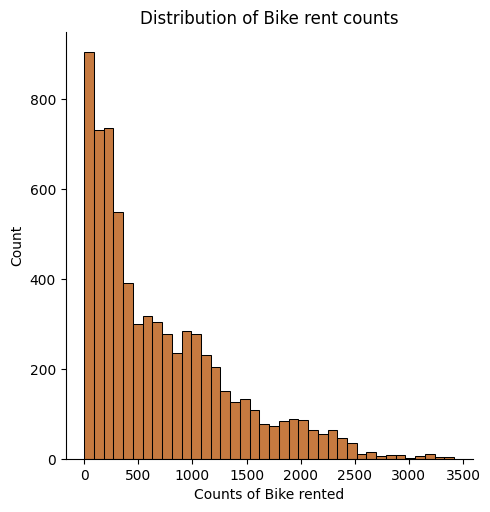

In [29]:
##Rented bike count 
sns.displot(x=y_train,color=[0.7,0.3,0])
plt.xlabel("Counts of Bike rented")
plt.title("Distribution of Bike rent counts")
plt.show()

## Observation 
Most of the bike rent counts are less than 500.

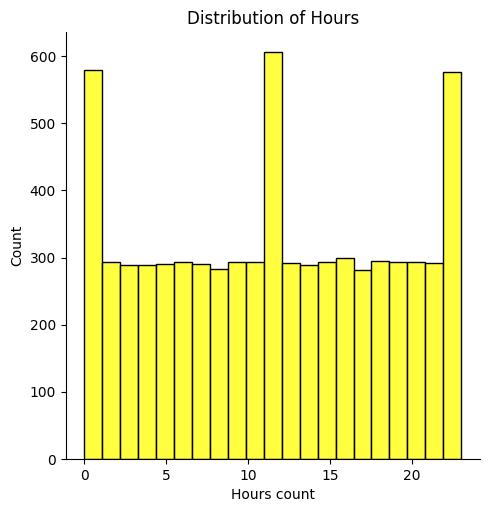

In [30]:
##hourly distribution
sns.displot(x=x_train['Hour'],color=[1,1,0])
plt.title("Distribution of Hours")
plt.xlabel("Hours count")
plt.show()

## Observation 
There are 3 peak hours.

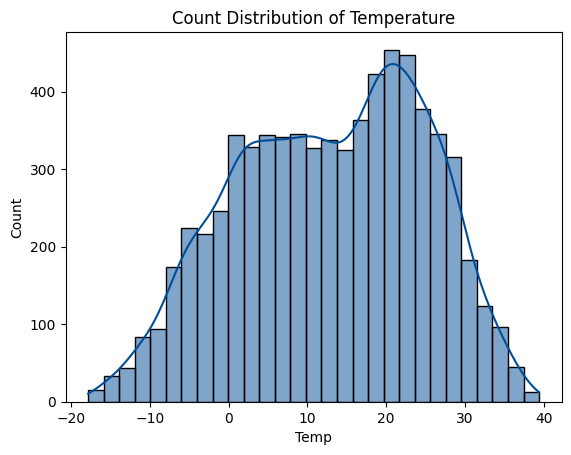

In [31]:
## distribution of temperature
sns.histplot(x=x_train['Temp'],kde=True, color=[0,.3,.6])
plt.title("Count Distribution of Temperature")
plt.show()

## Observation
To some extend it is normally distributed. so temperature ranges between 10 to 25.

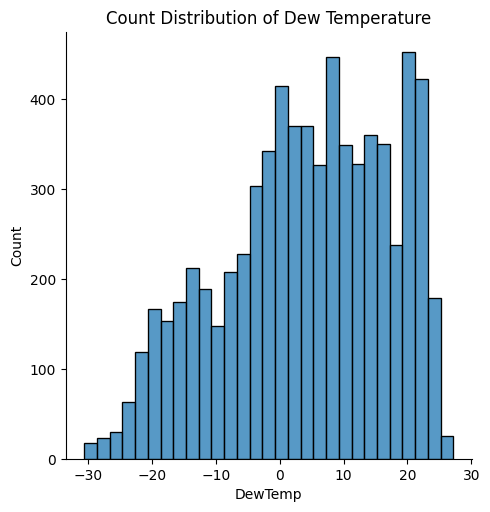

In [32]:
##Distribution of 
sns.displot(x=x_train['DewTemp'])
plt.title("Count Distribution of Dew Temperature")
plt.show()

## Observation
Seems a skewness nature. Most of the day the dew temperature is ranges between 0 to 25.

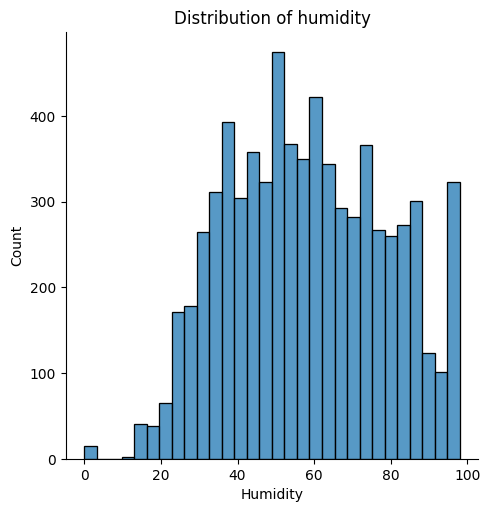

In [33]:
##humididty
sns.displot(x=x_train['Humidity'])
plt.title("Distribution of humidity")
plt.show()

## Observation
Mos of the day the presence of humididty ranges between 20 to 95.

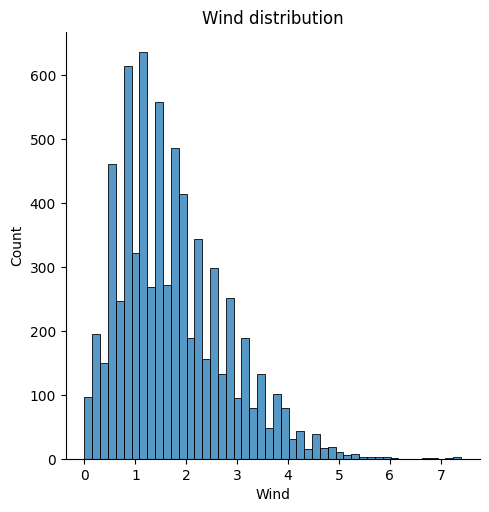

In [34]:
## wind distribution
sns.displot(x=x_train['Wind'])
plt.title("Wind distribution")
plt.show()

## Observation
So most of the day the wind speed ranges between 5m/s to 2.5m/s.

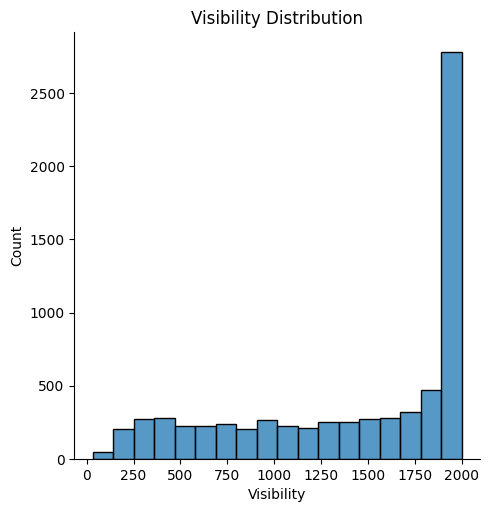

In [35]:
## visibility distribution
sns.displot(x=x_train['Visibility'])
plt.title("Visibility Distribution")
plt.show()

## Observation
Left skewed, most of the days has visibility of 2000

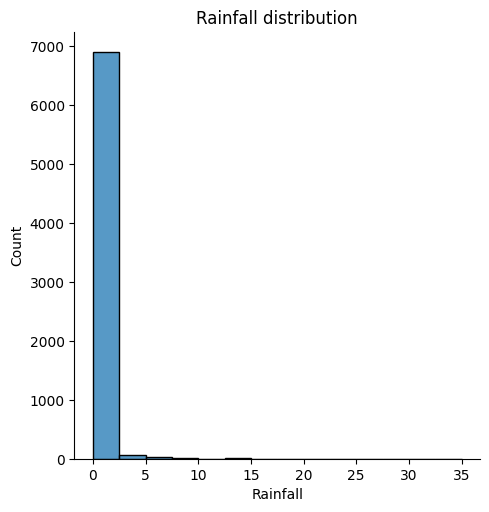

In [36]:
##solar radiation
sns.displot(x=x_train['Rainfall'])
plt.title("Rainfall distribution")
plt.show()

## Observation
Frequency of rainfall seems less in comparison.

# Categorical distribution 

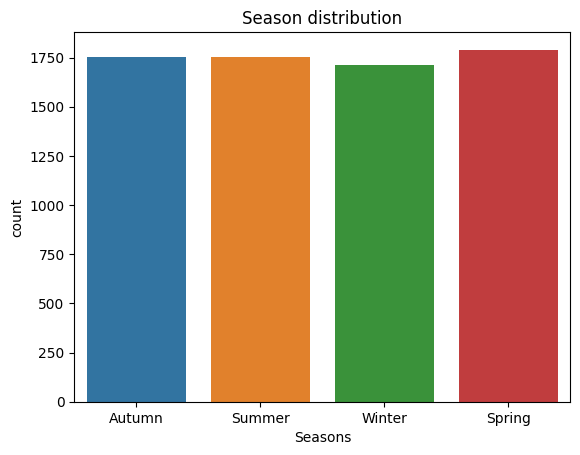

In [37]:
## season countplot
sns.countplot(data=x_train, x=x_train['Seasons'], hue=x_train['Seasons'])
plt.title("Season distribution")
plt.show()

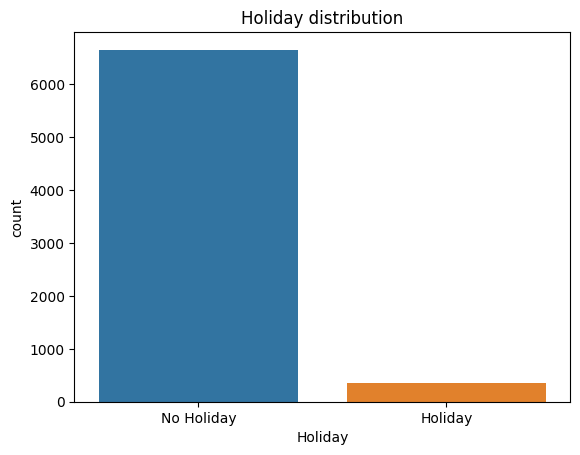

In [38]:
## holiday distribution
sns.countplot(data=x_train, x=x_train['Holiday'], hue=x_train['Holiday'])
plt.title("Holiday distribution")
plt.show()

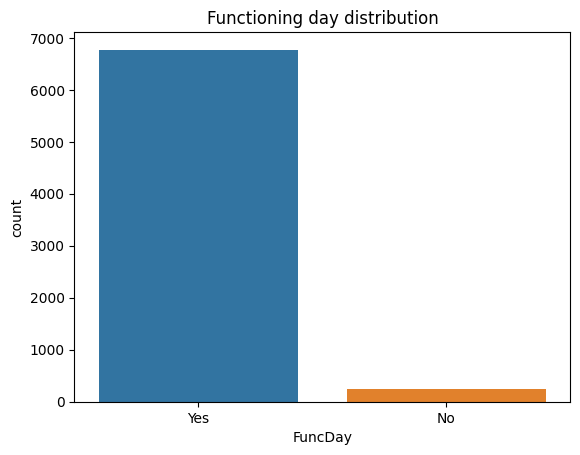

In [39]:
## functioning day
sns.countplot(data=x_train,x=x_train['FuncDay'],hue=x_train['FuncDay'])
plt.title("Functioning day distribution")
plt.show()

## Observation
Higher demand of bikes on Summer season, Working days and functioning days.

# Bivariate analysis

<Figure size 576x432 with 0 Axes>

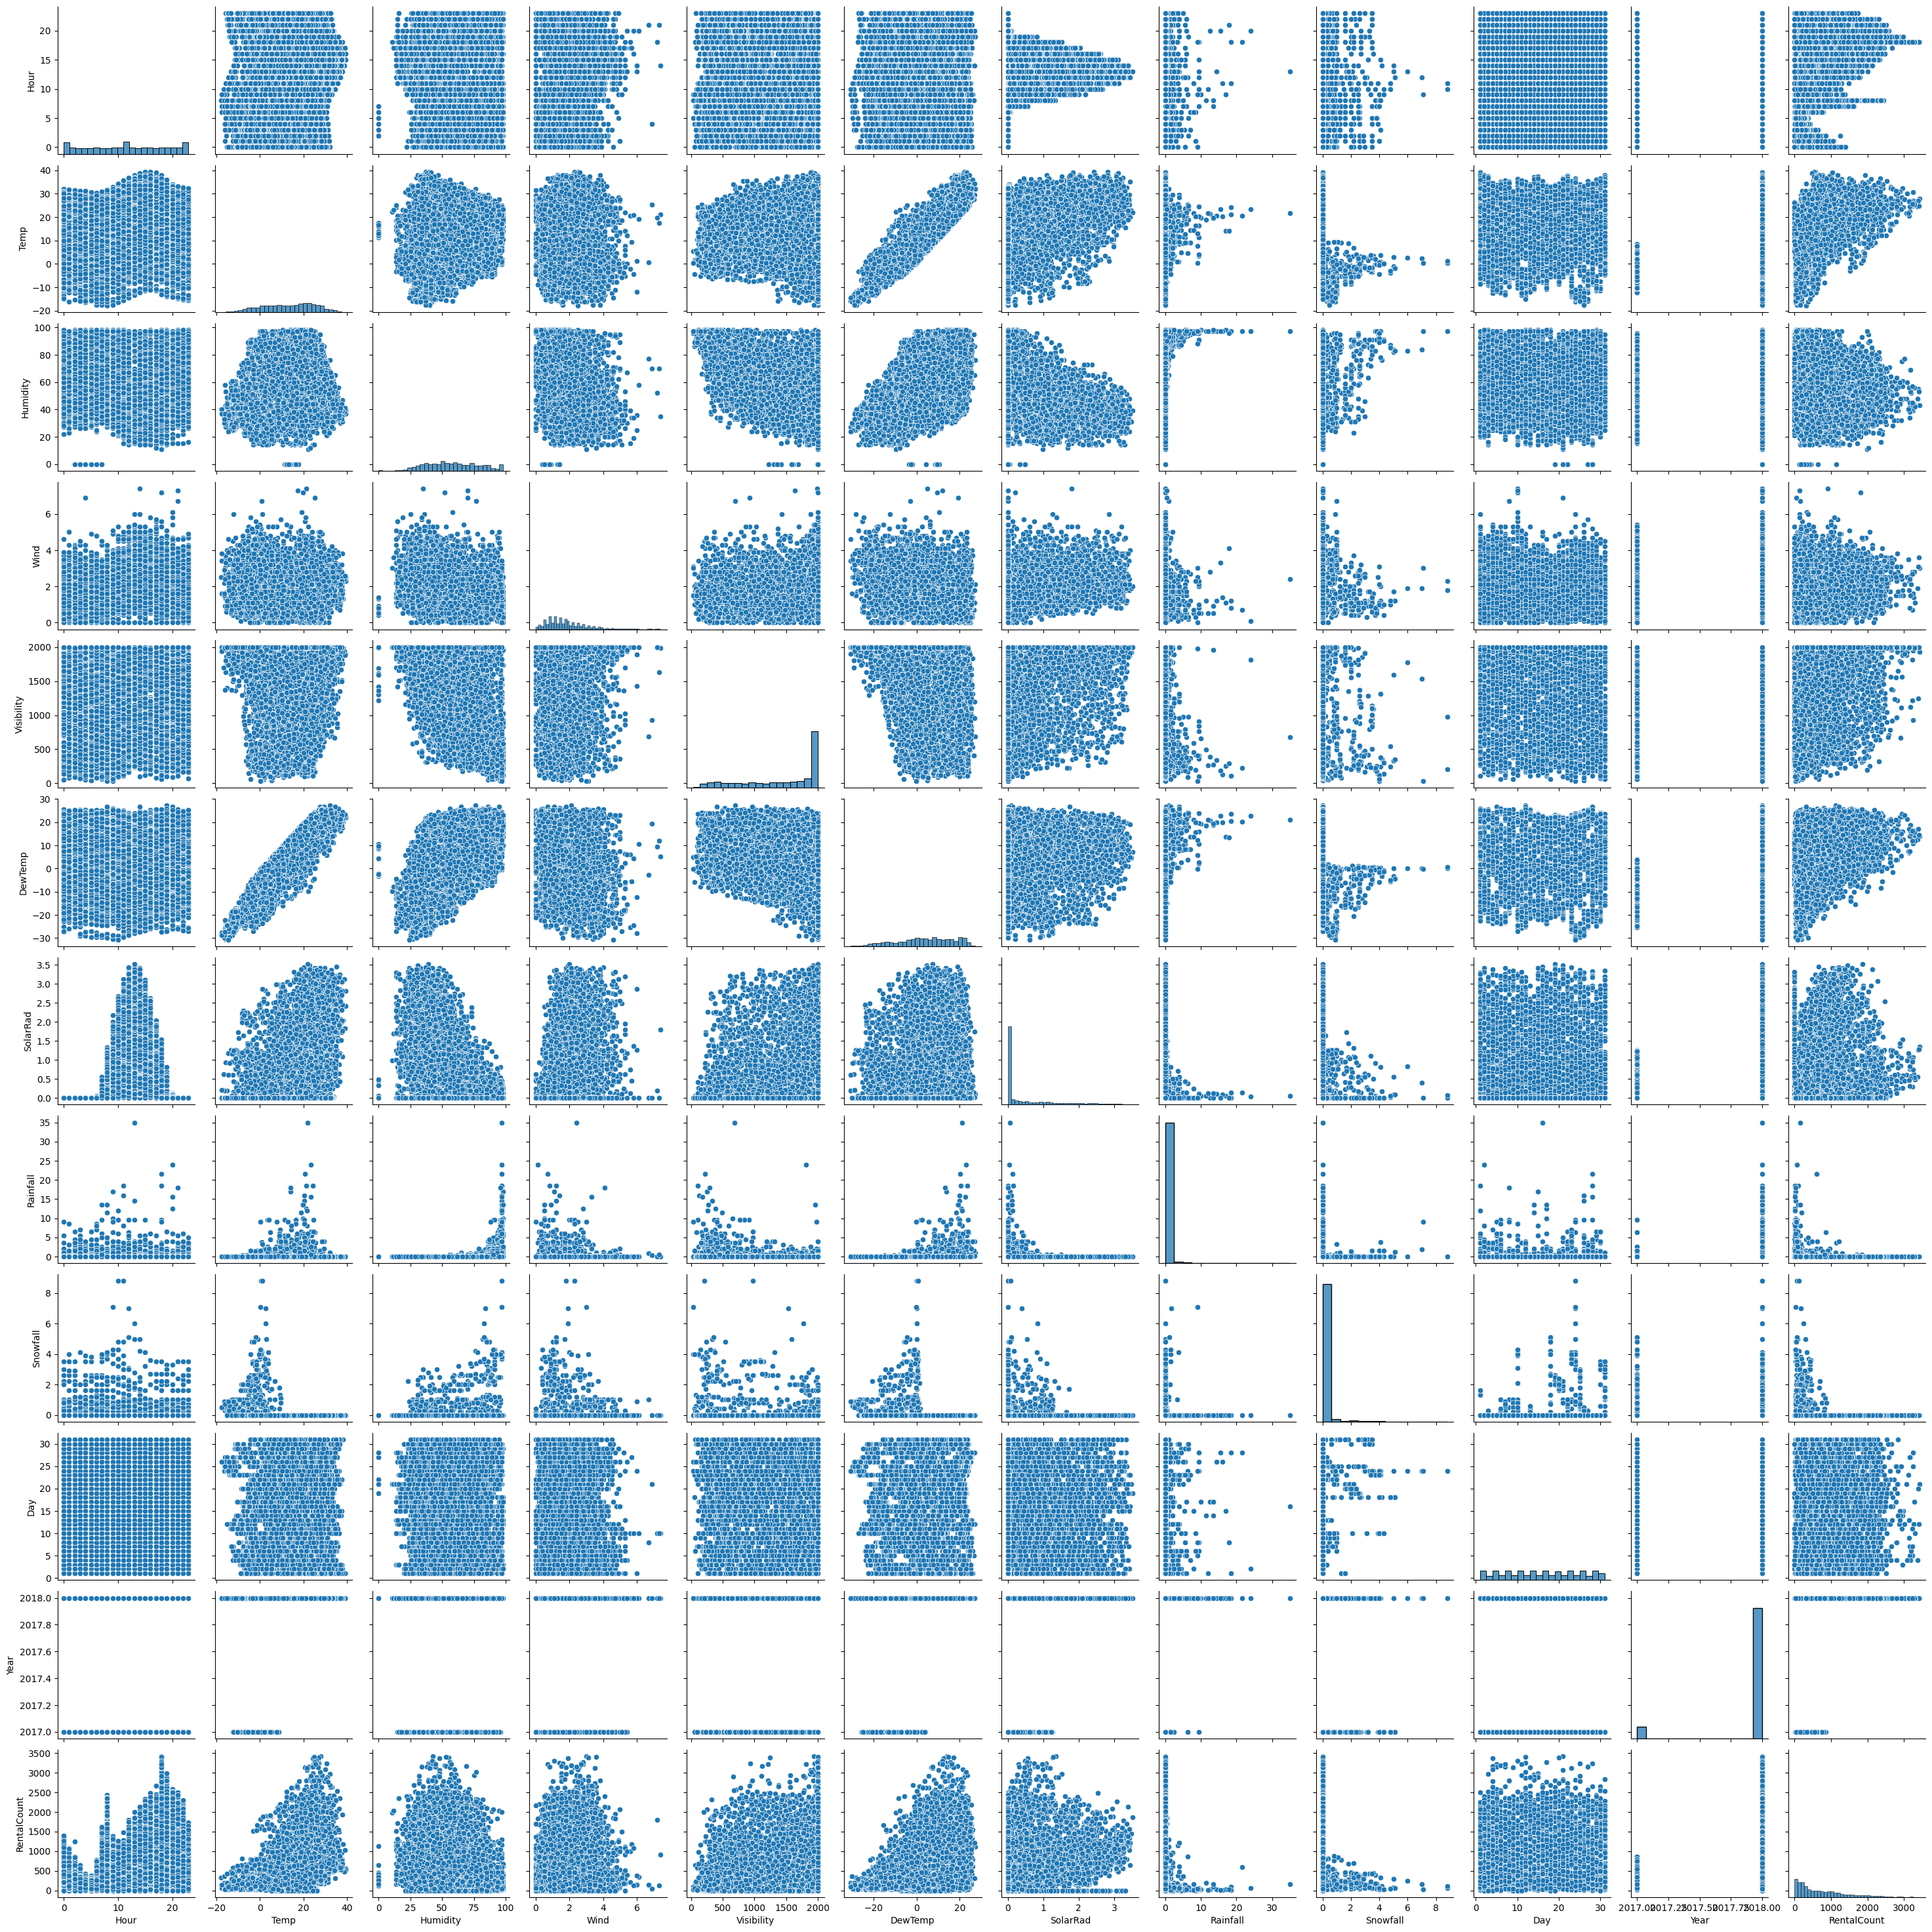

In [40]:
##pair plot 
df=x_train.copy()
df['RentalCount']=y_train
plt.figure(dpi=90)
sns.pairplot(df)
plt.show()

In [41]:
##changed feature names
num_feat=[num for num in x_train.columns if x_train[num].dtype!='O']
num_feat

['Hour',
 'Temp',
 'Humidity',
 'Wind',
 'Visibility',
 'DewTemp',
 'SolarRad',
 'Rainfall',
 'Snowfall',
 'Day',
 'Year']

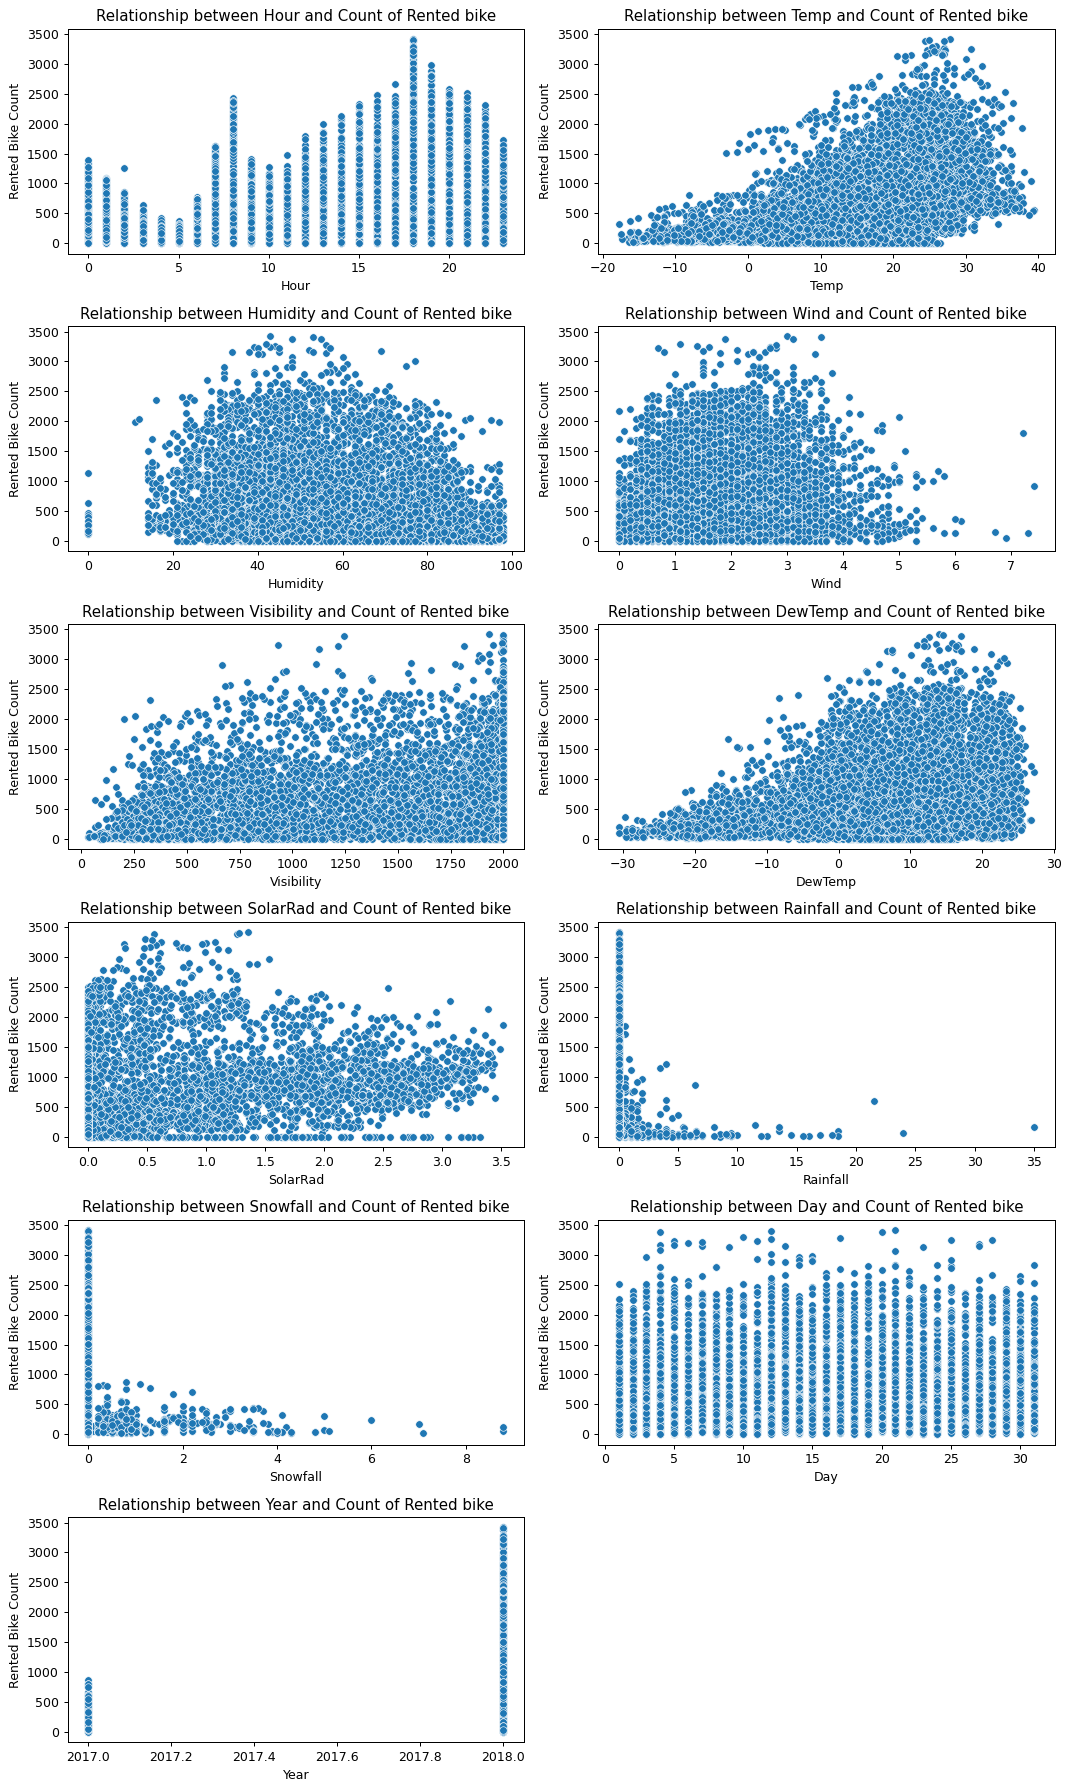

In [42]:
##plotting the relationship between target variable with numerical features
plt.figure(figsize=(12, 20), dpi=90)

plot_features = [f for f in num_feat if f != 'Count']  # remove target
nrows = (len(plot_features) + 1) // 2  # compute rows automatically, and takes quotient value as number of rows

for i, feat in enumerate(plot_features, start=1):
    plt.subplot(nrows, 2, i)
    sns.scatterplot(x=x_train[feat], y=y_train)
    plt.title(f"Relationship between {feat} and Count of Rented bike")

plt.tight_layout()
plt.show()

## Observation
1. Month-Count: So maximum customer rented the bike mostly in the month range from May to October of entire year.
2. Hour-Count: the demand of bikes starts from early at 0.0 AM little bit and drops upto 5AM, after that customer gradually starts renting it from 6AM to 8AM then drops a bit again but the demand of rented bike goes up from 10 AM constantly upto 6PM then slowing drops until 11PM.  
3. Temp-Count: At low temperature, customer rented hardly few bikes (e.g 500-700) but as the temperature increase the demand of renting bikes also increases.
4. Humidity-Count: The optimal level of humidity to rent the bikes at Seoul would be 35-60.
5. Wind-Count: At low wind speed, higher the demand of bikes.
6. Visibility-Count: Higher the visibility and higher the demand of bike.
7. (Rainfall & Snowfall)-Count: Less rainfall and snowfall higher demand and also have similar pattern.

In [43]:
##cat feature
cat_feat=[i for i in x_train.columns if x_train[i].dtype=='O']
cat_feat

['Seasons', 'Holiday', 'FuncDay', 'WeekDay', 'Month']

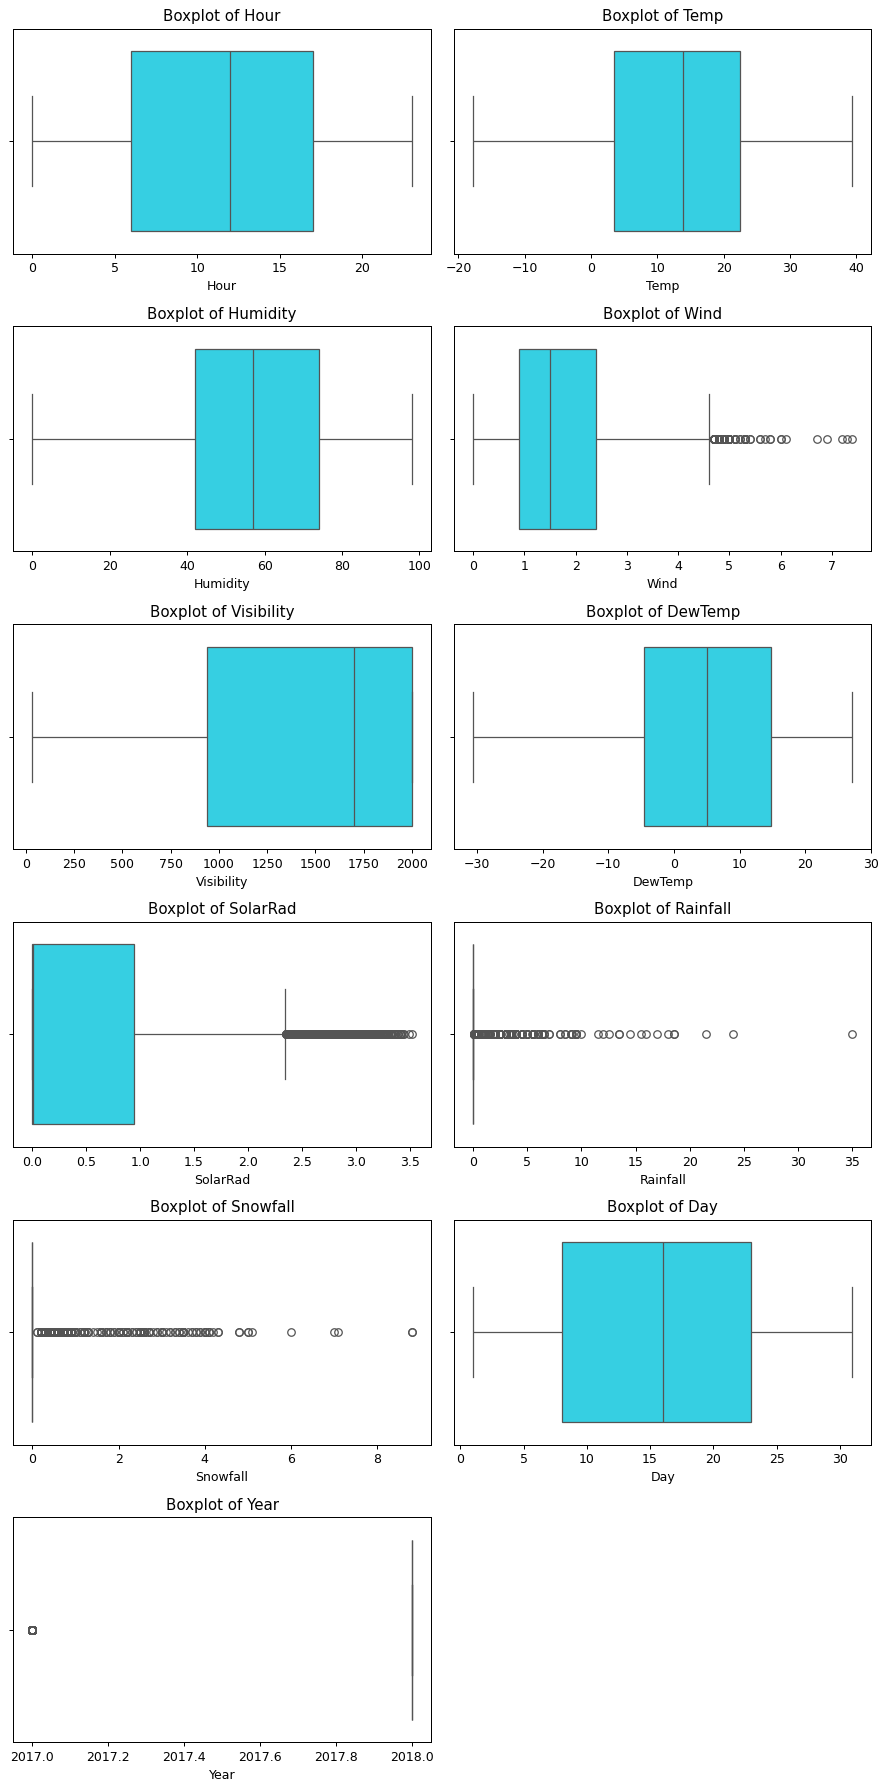

In [44]:
##boxplot of numerical features
plt.figure(figsize=(10,20),dpi=90)

nrows=(len(num_feat)+1)//2

for i, feat in enumerate(num_feat,start=1):
    plt.subplot(nrows,2,i)
    sns.boxplot(x=x_train[feat], color=[0.1,0.9,1])
    plt.title(f'Boxplot of {feat}')
plt.tight_layout()
plt.show()

## Observation
This boxplot shows that the features such as rented bike count, wind, solar radiation, rainfall and snowfall has some outliers. 

## Treatment
Outlier treatment is needed to the dataset.

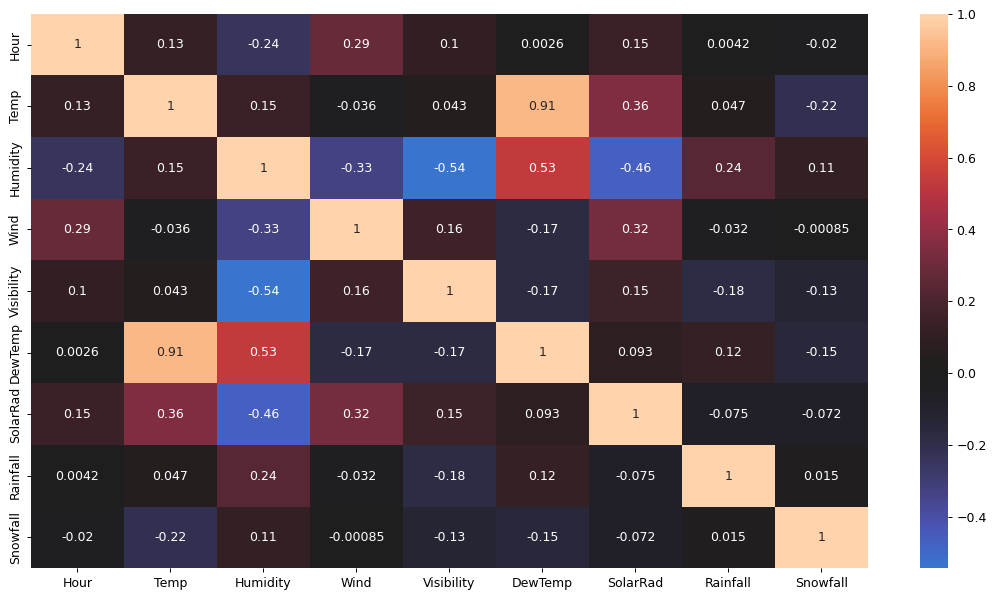

In [45]:
##Correlation of the data with heat map
##selecting only the numerical values
corr_matrix=x_train.select_dtypes(include='float').corr()
plt.figure(figsize=(15,8),dpi=90)
sns.heatmap(corr_matrix,annot=True, center=0)
plt.show()


## Observation 
It is interesting to see that Dew point temperature predictor feature is highly correlated with Temperature predictor feature having correlation coefficient is 0.91, so it can cause the multicoliearity issue. 

# VIF Test

In [46]:
## separating the independent and dependent feature
X=x_train
y=y_train

In [47]:
## checking the presence of multicollinearity in the data
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif_coef(X):
    # Calculating VIF
    vif = pd.DataFrame()
    ##independent features only
    vif["Predictor"] = X.columns
    ## VIF taking numpy array(X.values) of independent feature and position(i) of the feature
    vif["VIF Score"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] 
    return (vif)

In [48]:
##calculating the variance inflation factor
calc_vif_coef(X.select_dtypes(['float']))

Predictor  VIF Score
0        Hour   4.452322
1        Temp  33.093829
2    Humidity   5.381048
3        Wind   4.781358
4  Visibility   9.046670
5     DewTemp  16.795075
6    SolarRad   2.887376
7    Rainfall   1.084675
8    Snowfall   1.122320

In [49]:
## Dew temperature feature has high correlation to another independent feature i.e Temperature
del X['DewTemp']

In [50]:
calc_vif_coef(X.select_dtypes(['float']))

Predictor  VIF Score
0        Hour   3.960533
1        Temp   3.248119
2    Humidity   4.869836
3        Wind   4.586768
4  Visibility   4.695753
5    SolarRad   2.245100
6    Rainfall   1.083405
7    Snowfall   1.121972

## Observation 
Now the VIF score is less than 5 which means the data is free from high multicollinearity problem among the predictors. 

# Periodicity Checks

<Axes: xlabel='Hour'>

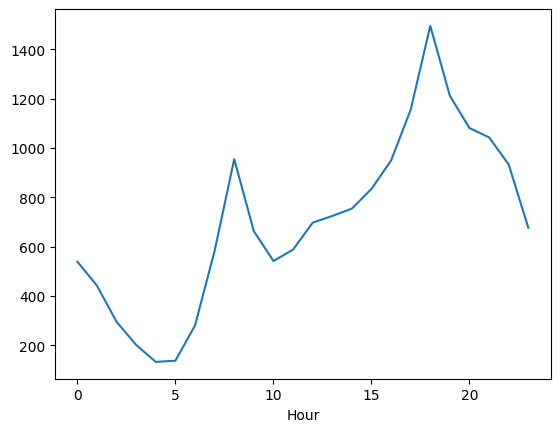

In [51]:
##Hours vs rental demand
df.groupby('Hour')['RentalCount'].mean().plot()

/var/folders/d2/v_pq11hn76q7r2f5yksqq2000000gn/T/ipykernel_26087/274531276.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Month=df.groupby('Month')['RentalCount'].sum().reset_index().sort_values(by='Month')


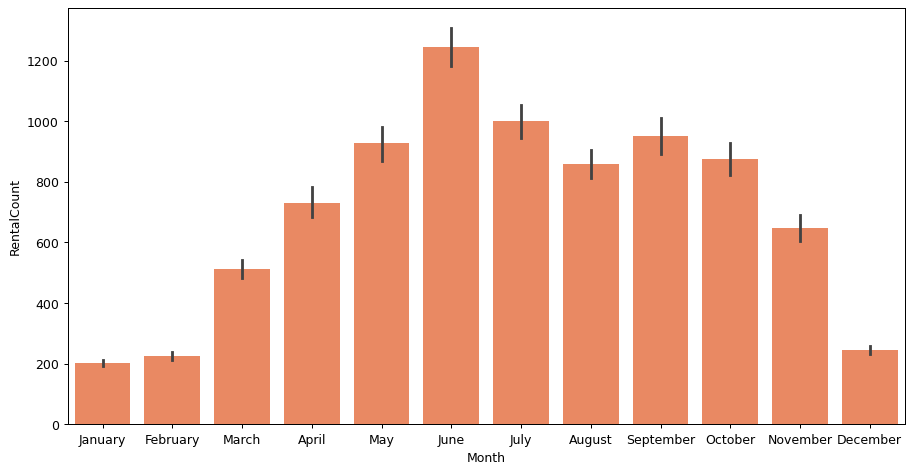

In [ ]:
## Month vs demand analysis ordering by month
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

df['Month'] = pd.Categorical(
    df['Month'],
    categories=month_order,
    ordered=True
)
Month=df.groupby('Month')['RentalCount'].sum().reset_index().sort_values(by='Month')
plt.figure(figsize=(12,6),dpi=90)
sns.barplot(x=df['Month'],y=df['RentalCount'],data=Month, color=[1,0.5,0.3])
plt.show()

## Observation
Maximum Users starts to rent the bikes from March to October/November but in three months from December to February, there is very less chances of bikes being used for travel in Seoul, may be cold weather.

In [53]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7008 entries, 8415 to 7270
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Hour        7008 non-null   float64
 1   Temp        7008 non-null   float64
 2   Humidity    7008 non-null   float64
 3   Wind        7008 non-null   float64
 4   Visibility  7008 non-null   float64
 5   SolarRad    7008 non-null   float64
 6   Rainfall    7008 non-null   float64
 7   Snowfall    7008 non-null   float64
 8   Seasons     7008 non-null   object 
 9   Holiday     7008 non-null   object 
 10  FuncDay     7008 non-null   object 
 11  Day         7008 non-null   int32  
 12  WeekDay     7008 non-null   object 
 13  Month       7008 non-null   object 
 14  Year        7008 non-null   int32  
dtypes: float64(8), int32(2), object(5)
memory usage: 821.2+ KB


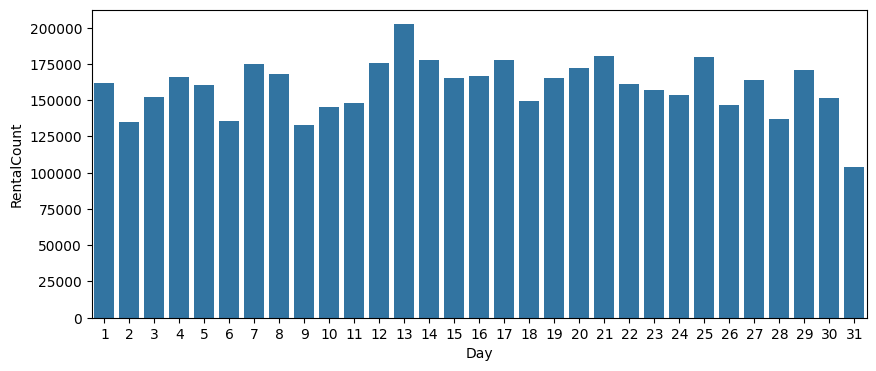

In [54]:
##week days vs demand analysis
plt.figure(figsize=(10,4))
days=df.groupby('Day').sum().reset_index()
sns.barplot(x='Day',y='RentalCount', data=days)
plt.show()

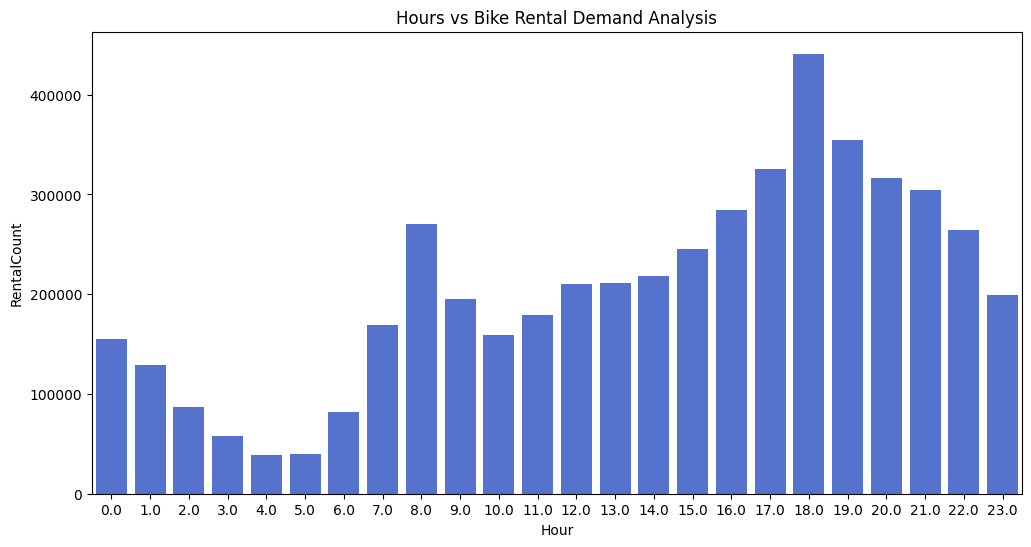

In [55]:
## Hours vs Bike rental demand analysis

plt.figure(figsize=(12,6))
hours=df.groupby('Hour').sum().reset_index()
sns.barplot(x="Hour", y="RentalCount", data=hours, color='royalblue')
plt.title("Hours vs Bike Rental Demand Analysis")
plt.show()

## Observation 
As compared to weekend, week days has higher demand of bikes probably the reason is people works on week days.

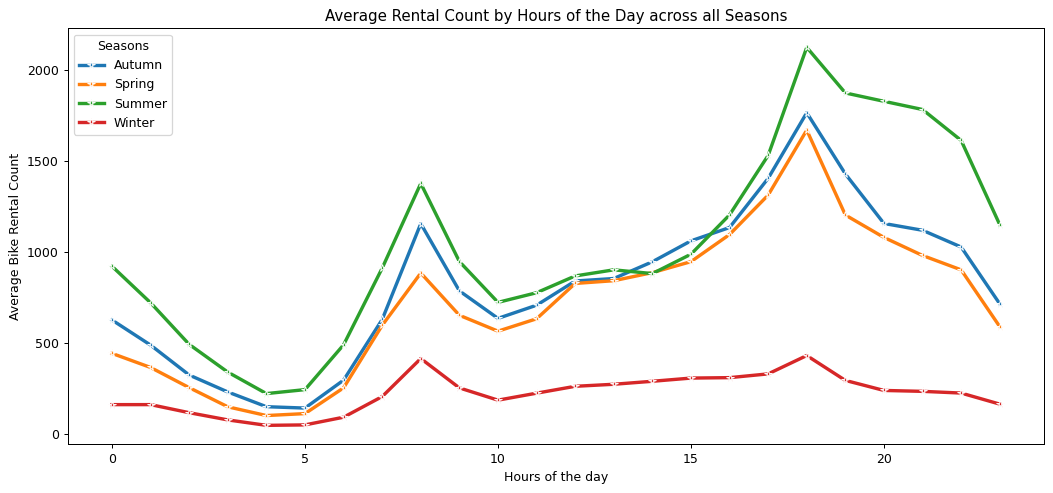

In [56]:
## Average user count by Hours of the day across season
avg_user_hr=df.groupby(['Seasons','Hour'])['RentalCount'].mean().reset_index()
##plot
plt.figure(figsize=(14,6), dpi=90)
sns.lineplot(x='Hour',y='RentalCount', hue='Seasons', marker='*',data=avg_user_hr, linewidth=2.7)
plt.title("Average Rental Count by Hours of the Day across all Seasons")
plt.xlabel("Hours of the day")
plt.ylabel("Average Bike Rental Count")
plt.show()

## Observation
1. Summar season: It is the highest bike rental demand season among all seasons, and it shows a peak hours pattern at 8AM and 18PM.
2. Autum season: It is the second highest bike rental demand season with similar peak hours pattern.
3. Spring season: It is a 3rd highest bike rental demand season with similar peak hour pattern.
4. Winter season: Winter has low bike rental demand, normally users prefer not to use bikes to travel in winter.

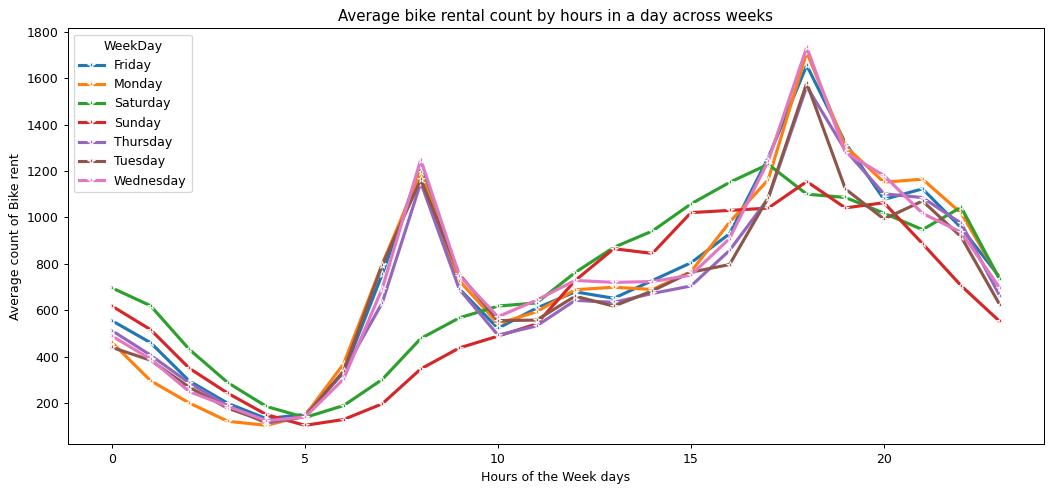

In [57]:
## Average Rental bike count by hours of the day across weekdays
wdays=df.groupby(['WeekDay','Hour'])['RentalCount'].mean().reset_index()
plt.figure(figsize=(14,6), dpi=90)
sns.lineplot(x='Hour',y='RentalCount',hue='WeekDay',marker='*',data=wdays, linewidth=2.5)
plt.title("Average bike rental count by hours in a day across weeks")
plt.xlabel("Hours of the Week days")
plt.ylabel('Average count of Bike rent')
plt.show()

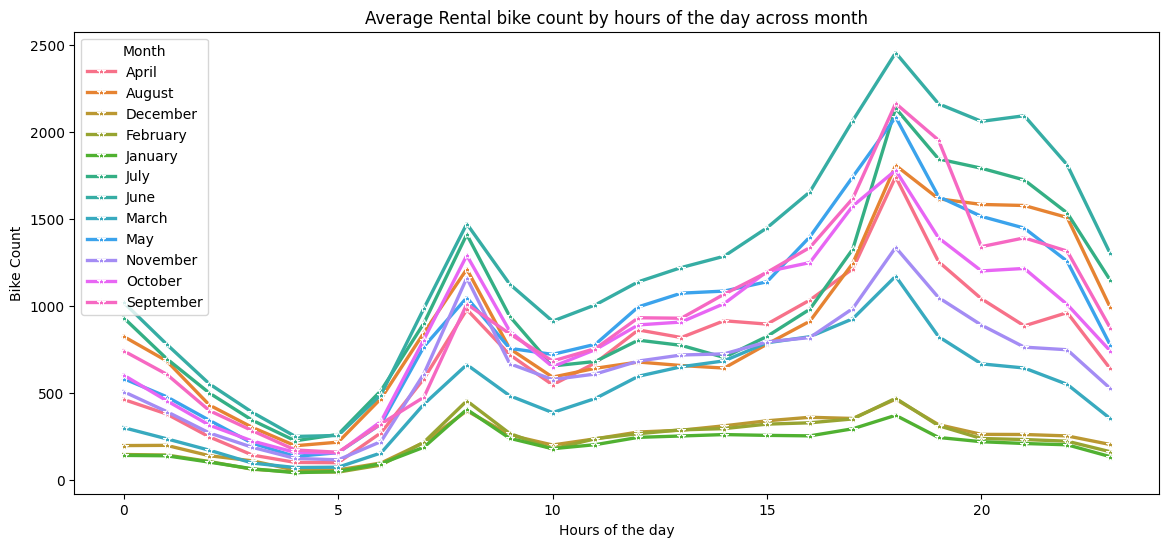

In [58]:
##Average Rental bike count by hours of the day across month
mhour=df.groupby(['Hour','Month'])['RentalCount'].mean().reset_index()
plt.figure(figsize=(14,6))
sns.lineplot(x='Hour',y='RentalCount',hue='Month', data=mhour, marker='*',linewidth=2.4)
plt.title("Average Rental bike count by hours of the day across month")
plt.xlabel("Hours of the day")
plt.ylabel("Bike Count")
plt.show()

## Observation:
The average demand of bike rental count  except Jan, Feb and Dec has higher at 8AM and 18PM

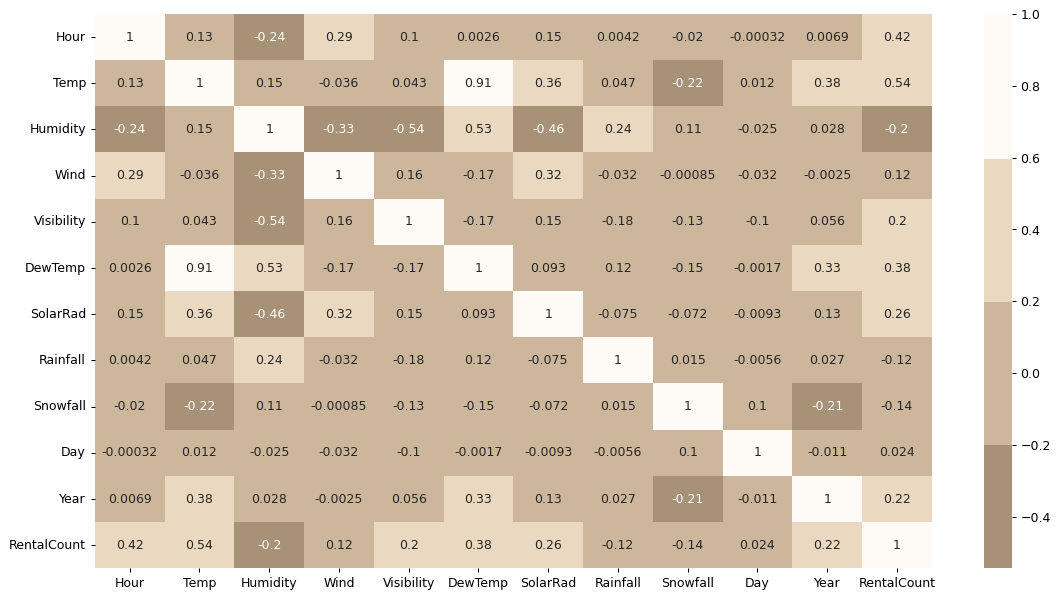

In [59]:
corr_matrix=df.select_dtypes(include=['float','int']).corr()
plt.figure(figsize=(15,8),dpi=90)
sns.heatmap(corr_matrix,annot=True, center=0, cmap=['#8A6D55', '#A79277', '#CDB79C', '#EAD8C0', '#FEFAF6'])
plt.show()

In [60]:
## Saved the training data dataset
df.to_csv("Bike_train.csv")

In [61]:
##Testset
## Extracting the Day, Month and Year feature from the Date column
x_test['Day']=x_test['Date'].dt.day
x_test['WeekDay']=x_test['Date'].dt.day_name()
x_test['Month']=x_test['Date'].dt.month_name()
x_test['Year']=x_test['Date'].dt.year


dftest=x_test
dftest['RentalCount']=y_test

del dftest['Dew point temperature(蚓)']

In [62]:
##Testing dataset
dftest.to_csv("Bike_test.csv")